# AI Personalized Career Advisor #

Name: **Vishal** **(iitrpr_ai_25010832)**

Project Track: AI Applications – Individual Open Project

## Problem Definition & Objective ##
-  Selected project track
 -Track: AI Applications – Individual Open Project
 -Type: ML-based Recommendation/Classification system

-  Clear problem statement
 -Build a system that takes student profile (GPA, interest area, skills, -subjects, activities, etc.) and predicts a suitable career role.

-  Real-world relevance & motivation
 -Students face confusion in choosing careers. This system provides -data-driven guidance to help students explore suitable career paths and -skill directions.

## Data Understanding & Preparation ##
 -  Dataset source
 - Public dataset from Kaggle: https://www.kaggle.com/datasetskamakshilahoti/student-extracurriculars-info
 - Data includes student academics + extracurricular info.

- **Data loading & exploration**

    This cell runs your script (professional modular approach).
    

**All scripts are executed using the active Jupyter kernel (`sys.executable`) to ensure cross-platform compatibility during evaluation.**


In [1]:
import os
from pathlib import Path

# If src exists here, we are already at project root
if Path("src").exists():
    print("Project root already set to:", os.getcwd())

# Else try moving one level up
elif Path("..").joinpath("src").exists():
    os.chdir("..")
    print("Moved to project root:", os.getcwd())

else:
    raise RuntimeError("Cannot locate project root (src folder not found).")


Project root already set to: /Users/vishal/ai_learning


In [2]:
import sys
!{sys.executable} src/data_cleaning.py


Loading dataset...
Original Data Shape: (1000, 9)
 - 'gender' column created with random values.
 - Checking for outliers...
Final Data Shape: (1000, 10)
Success: Cleaned data saved to 'career_data_cleaned.csv'


### All COMMAND ###
 
- **Data cleaning**
- **EDA**
- **Feature Engineering**
- **Random Forest**

In [11]:
!{sys.executable} src/data_cleaning.py
!{sys.executable} src/eda.py
!{sys.executable} src/feature_engineering.py
!{sys.executable} src/models/train_random_forest.py


Loading dataset...
Original Data Shape: (1000, 9)
 - 'gender' column created with random values.
 - Checking for outliers...
Final Data Shape: (1000, 10)
Success: Cleaned data saved to 'career_data_cleaned.csv'
Data Loaded for EDA. Shape: (1000, 10)
Figure(1000x600)
Figure(800x500)
/Users/vishal/ai_learning/src/eda.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')
Figure(600x400)
/Users/vishal/ai_learning/src/eda.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
Figure(1000x500)
/Users/vishal/ai_learning/src/eda.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` va

**Cleaning, preprocessing, feature engineering**

 - Cleaning done in src/data_cleaning.py:
 - Standardized column names (lowercase + underscores)
 - Removed duplicates
 - Removed missing rows / handled quality checks
 - Outlier removal using IQR for numeric columns
 - Basic text cleanup for skills
 - Saved cleaned CSV

**Handling missing values or noise**
 
 - Missing values: removed / cleaned during preprocessing (depending on columns)
 - Noise handling: 12% label noise injected during training to simulate real-world uncertainty   (avoids fake 99% accuracy)
 - This improves realism of evaluation.

**What this produces:**



In [20]:
import pandas as pd

df = pd.read_csv("data/processed/career_data_cleaned.csv")
print("Cleaned shape:", df.shape)
df.head()

Cleaned shape: (1000, 10)


,extracurricularactivities,skills,location,yearofstudy,subjects,gpa,languages,clubmemberships,interestarea,gender
0,Debate Club,Problem Solving,Andhra Pradesh,Freshman,Psychology,6.54,"Chinese, Japanese, Spanish, German, French","Music Club, Art Club, Sports Team, Debate Club...",Computer science,Male
1,Debate Club,"Leadership, Problem Solving, Public Speaking, ...",Arunachal Pradesh,Graduate,Physics,6.34,"French, English, Chinese, Spanish, Japanese","Art Club, Music Club, Sports Team, Coding Club",History,Female
2,Volunteer Group,"Data Analysis, Leadership, Public Speaking, Ar...",Assam,Junior,Biology,4.18,"Spanish, Japanese, German, French","Music Club, Art Club, Debate Club, Volunteer G...",Biology,Male
3,Volunteer Group,"Public Speaking, Data Analysis, Problem Solving",Andaman & Nicobar Islands,Graduate,Biology,5.12,"Japanese, Chinese, Spanish, French","Sports Team, Volunteer Group",Computer science,Male
4,Sports Team,Data Analysis,Chandigarh,Graduate,Computer Science,4.02,English,"Sports Team, Volunteer Group, Music Club",Biology,Male


### EDA (Exploratory Data Analysis) ###

In [13]:
!{sys.executable} src/eda.py


Data Loaded for EDA. Shape: (1000, 10)
Figure(1000x600)
Figure(800x500)
/Users/vishal/ai_learning/src/eda.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='pastel')
Figure(600x400)
/Users/vishal/ai_learning/src/eda.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
Figure(1000x500)
/Users/vishal/ai_learning/src/eda.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
Figure(1000x500)
/Users/vishal/ai_learning/src/eda.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and

## Run feature engineering ##

In [3]:
!{sys.executable} src/feature_engineering.py


Data loaded: (1000, 10)
Generating target column: career_role
Feature engineering completed
Target distribution:
career_role
3    499
6    143
2    116
1     69
4     61
0     59
5     53
Name: count, dtype: int64


#### Creates encoded data + label map ####

**Outputs**

 `data/processed/career_data_encoded.csv`

 `data/processed/label_encoding_map.json`

## Model ##

   **AI technique used**
 - Machine Learning (Supervised Classification)
 - Algorithm used here: Random Forest Classifier

**Architecture / pipeline**
 - Data Cleaning → Feature Engineering → Train/Test Split → Model Training → Evaluation → Save Model +  Reports

**Justification**
 - Random Forest handles non-linear patterns well
 - Works with mixed features
 - Balanced weights help class imbalance
 - Noise injection improves real-world simulation

## Core Implementation ##

In [15]:
!{sys.executable} src/models/train_random_forest.py

Data Loaded. Shape: (1000, 11)
----------------------------------------
Injecting 12% noise into the entire dataset...
Modified 120 rows to simulate real-world data.
----------------------------------------
Data split done
Training Random Forest...
Training complete

Training accuracy: 0.9450
Test accuracy:     0.8500

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.81      0.81      0.81        16
           2       0.81      0.74      0.77        23
           3       0.88      0.89      0.89        92
           4       0.85      0.79      0.81        14
           5       0.71      0.77      0.74        13
           6       0.89      0.89      0.89        28

    accuracy                           0.85       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.85      0.85      0.85       200

confusion matrix saved
model saved to joblib


**Runs top-to-bottom, saves**

In [16]:
print(open("reports/rf_classification_report.txt", "r").read())

Training accuracy: 0.9450
Test accuracy:     0.8500

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.81      0.81      0.81        16
           2       0.81      0.74      0.77        23
           3       0.88      0.89      0.89        92
           4       0.85      0.79      0.81        14
           5       0.71      0.77      0.74        13
           6       0.89      0.89      0.89        28

    accuracy                           0.85       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.85      0.85      0.85       200



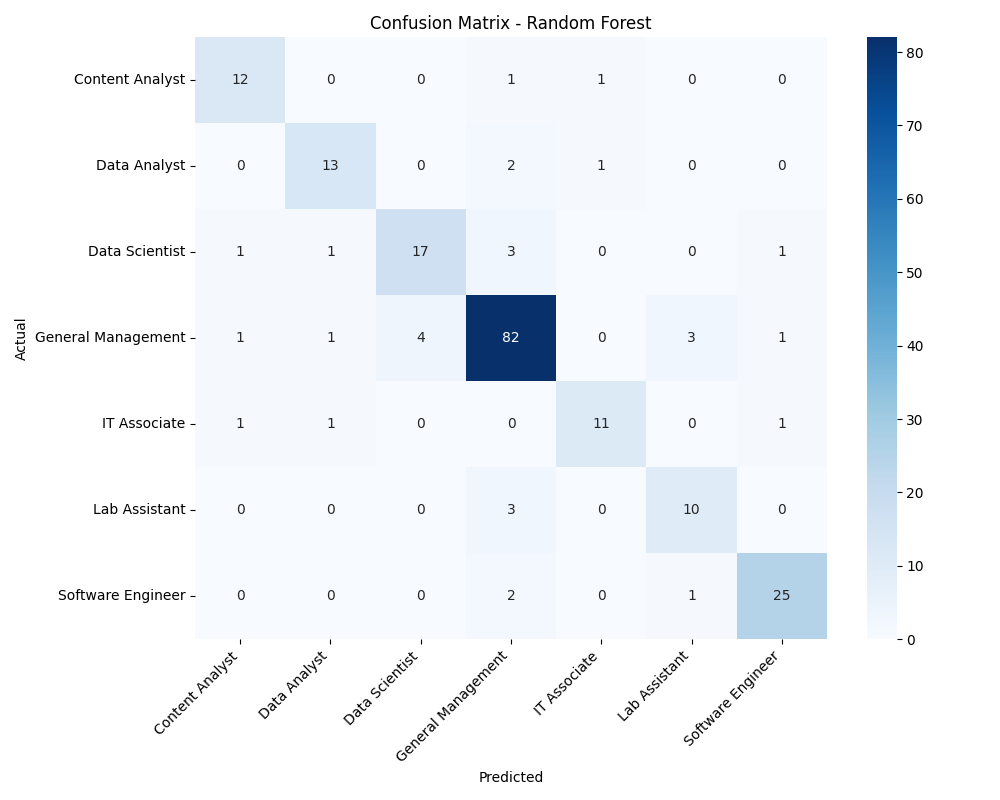

In [17]:
from IPython.display import Image, display

display(Image(filename="reports/rf_confusion_matrix.png"))


## Evaluation & Analysis ##
 
   **Metrics used (Markdown Cell)**

 - Accuracy

 - Precision, Recall, F1-score (classification report)

 - Confusion Matrix

 **Performance analysis & limitations**

 - Results (example from report):
 - Train Accuracy ≈ 94.5%
 - Test Accuracy ≈ 85%

 **Limitations**

 - Career labels are rule-based (not real placement data)
 - Skills encoded as labels (semantic meaning limited)
 - Dataset size and diversity limited
 - Some overlap between similar roles (Data Analyst vs Data Scientist)



## Ethical Considerations & Responsible AI ##

**Bias & fairness**
 
 - Synthetic gender values may cause bias
 - Rule-based target creation may embed assumptions

 
**Dataset limitations**
 
 - Public dataset, limited scope
 - Not real job placement outcomes
 - Self-reported skills may contain noise

**Responsible use**

 - Guidance tool only, not final career decision
 - Transparent evaluation + saved reports

## Conclusion & Future Scope ##
  
**Summary of results**

 - Built complete ML pipeline for career prediction
 - Random Forest achieved strong accuracy with realistic noise
 - Generated evaluation artifacts (report + confusion matrix)

**Possible improvements**

 - Use real placement/alumni outcome labels (better ground truth)
 - Improve skill encoding using NLP (TF-IDF / embeddings)
 - Add explainability (feature importance / SHAP)
 - Add multi-career recommendations (top-3 careers instead of 1)
 -Deploy with Streamlit UI for interactive guidance